In [1]:
import xarray as xr
import numpy as np

In [2]:
from matplotlib.patches import Rectangle

In [3]:
from plot_config import *

In [4]:
from utils import *

In [5]:
xg = np.load('plotting_xg.npy')
yg = np.load('plotting_yg.npy')

In [6]:
ecco_grid = xr.open_zarr('~/ECCO_transport')

In [7]:
for fc in [6,7]:

    discontinue_face = xg[fc]<0
    xg[fc][discontinue_face]+=360

In [8]:
vmax = 30
def plot2d(sp,vmax = vmax,title = False, hash_type = 'wholedepth',save_as  =False,extent = extent):
    plt.figure(figsize = (16,9))
    ax = plt.axes(projection = projection)
    # extent = (-95, 15, -10, 90)
    ax.set_extent(extent)
    n = 20
    aoi = mpath.Path(
        list(zip(np.linspace(extent[0],extent[1], n), np.full(n, extent[3]))) + \
        list(zip(np.full(n, extent[1]), np.linspace(extent[3], extent[2], n))) + \
        list(zip(np.linspace(extent[1], extent[0], n), np.full(n, extent[2]))) + \
        list(zip(np.full(n, extent[0]), np.linspace(extent[2], extent[3], n)))
    )
    ax.set_boundary(aoi, transform=ccrs.PlateCarree())
    if hash_type == 'wholedepth':
        # pass
        ct = maps['count'].sum(axis = 0)/2
    else:
        ct = maps['count'][0]/2
    condition = np.logical_and(True, ct<5e3)
    to_plot = sp*VOLUME_EACH/ecco_grid.rA
    zm = np.ma.masked_where(condition,to_plot)
    for i in [1,2,6,7,10,11]:
        p2 = ax.pcolormesh(xg[i] ,yg[i] ,to_plot[i] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree())
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.add_patch(Rectangle((xlim[0], ylim[0]), xlim[1]-xlim[0], ylim[1]-ylim[0], fill=False, hatch='..'))
    for i in [1,2,6,7,10,11]:
        p2 = ax.pcolormesh(xg[i] ,yg[i] ,zm[i] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')
    plt.colorbar(p2, label = r'$psu\cdot m$',extend = 'both')
    
    if title:
        plt.title(title)
    if save_as:
        plt.savefig(save_as,dpi = dpi)
    # plt.show()

In [9]:
fig_dic = {
    'fresh':'figure2',
    'salty':'figure5'
}
suffix = '.png'
sup_pref = 'sup_figure2_'

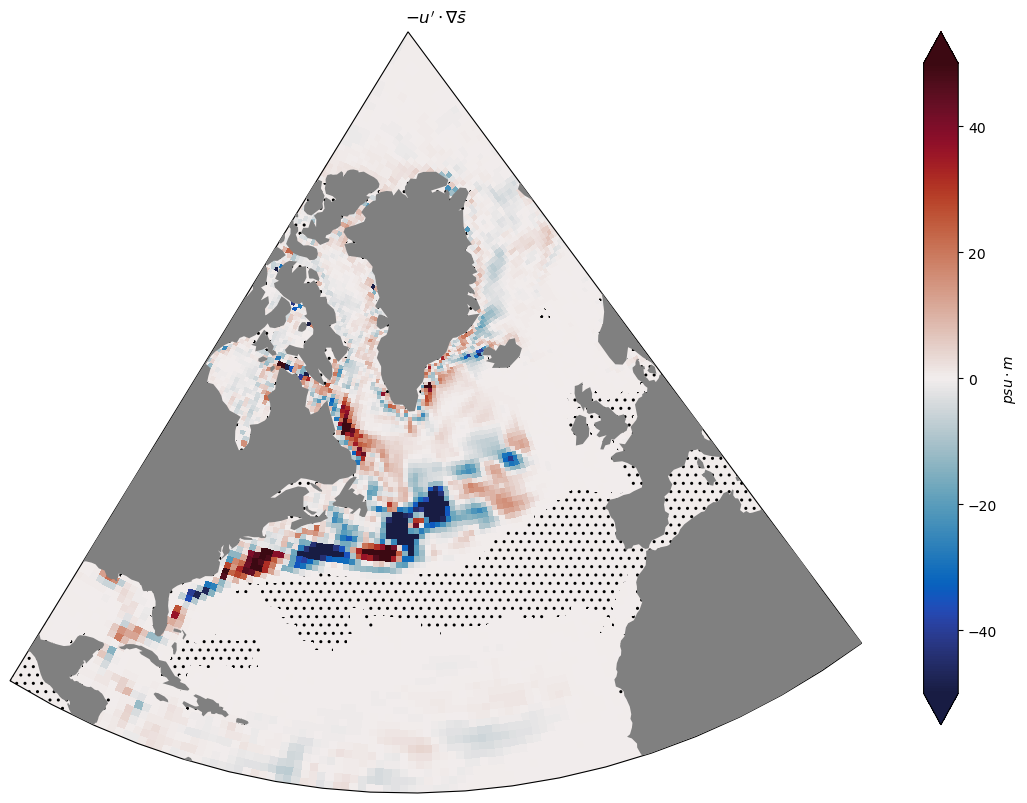

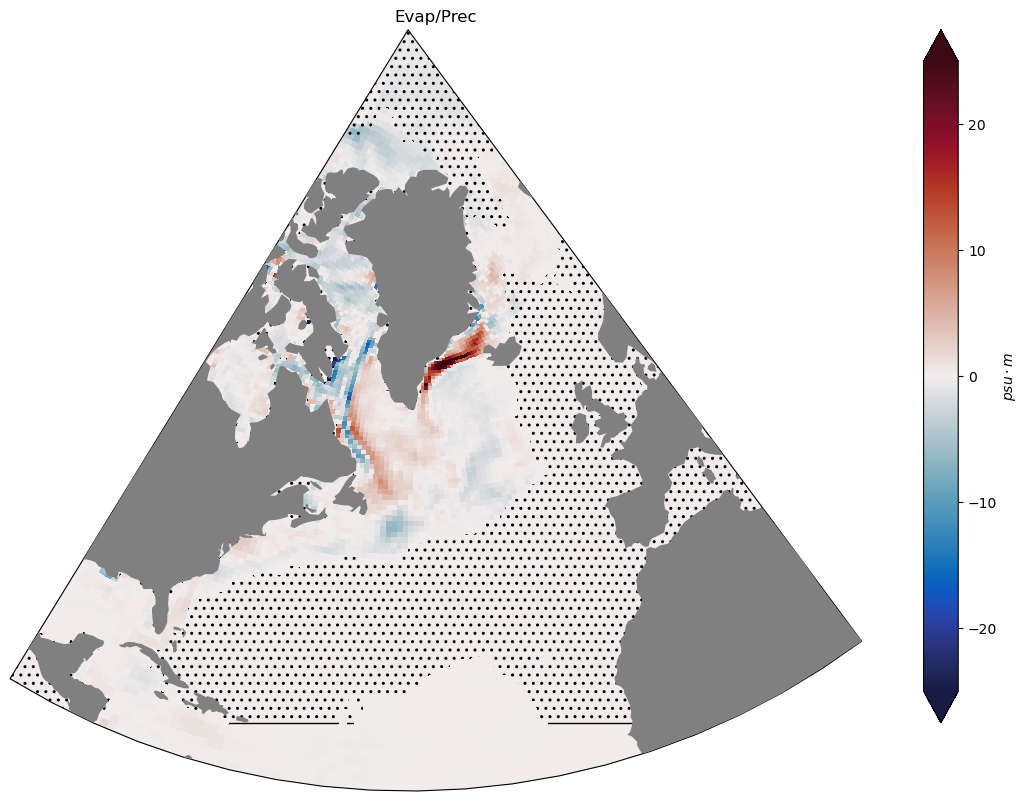

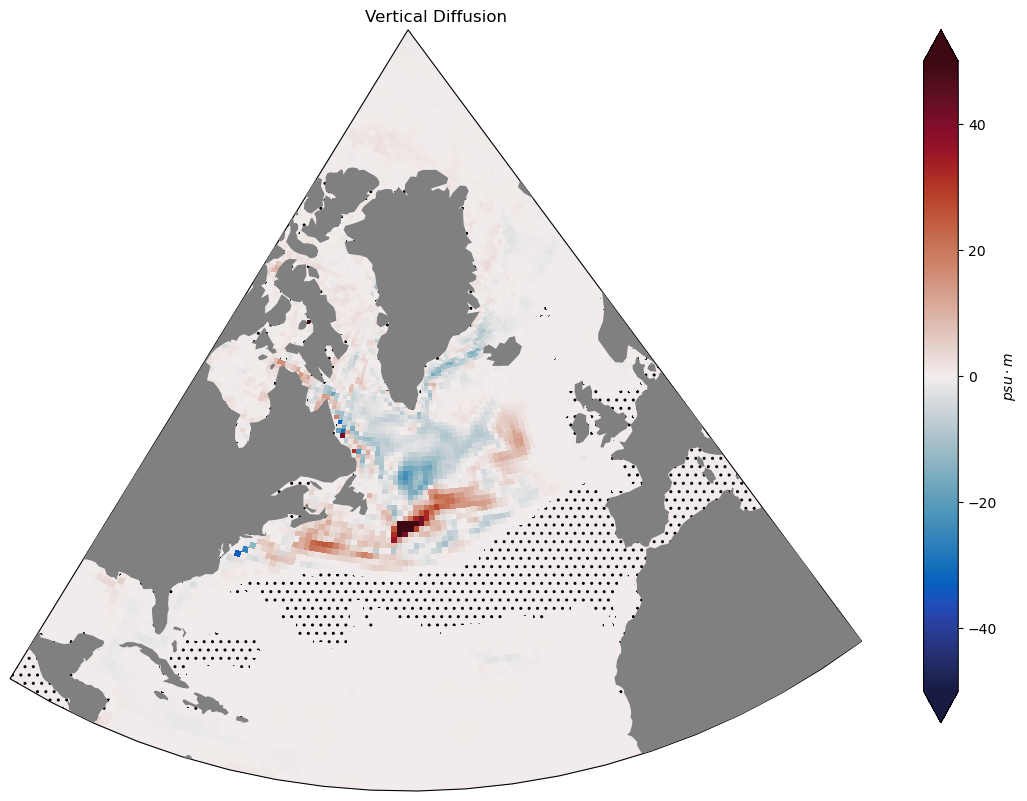

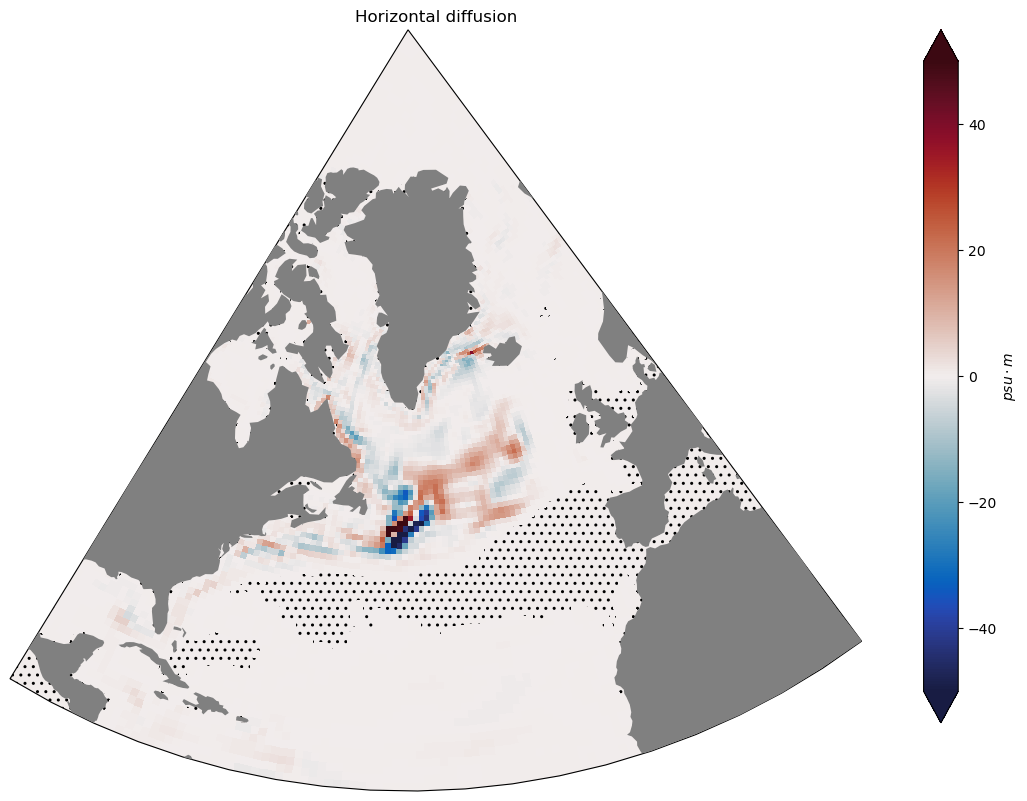

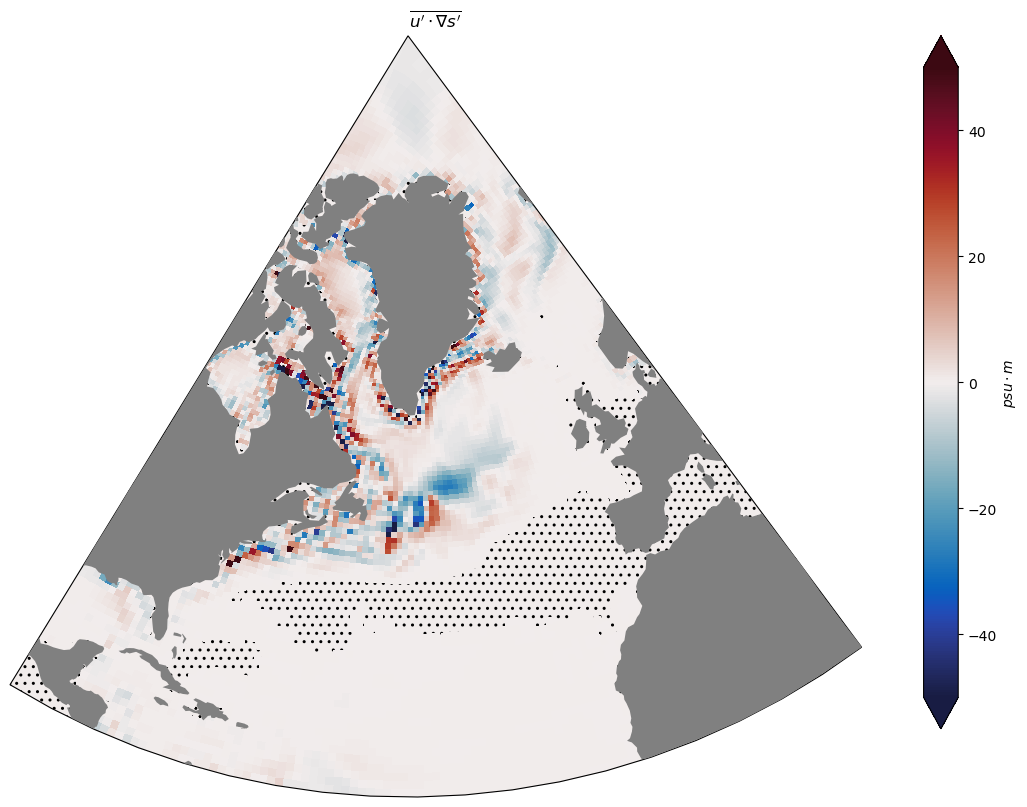

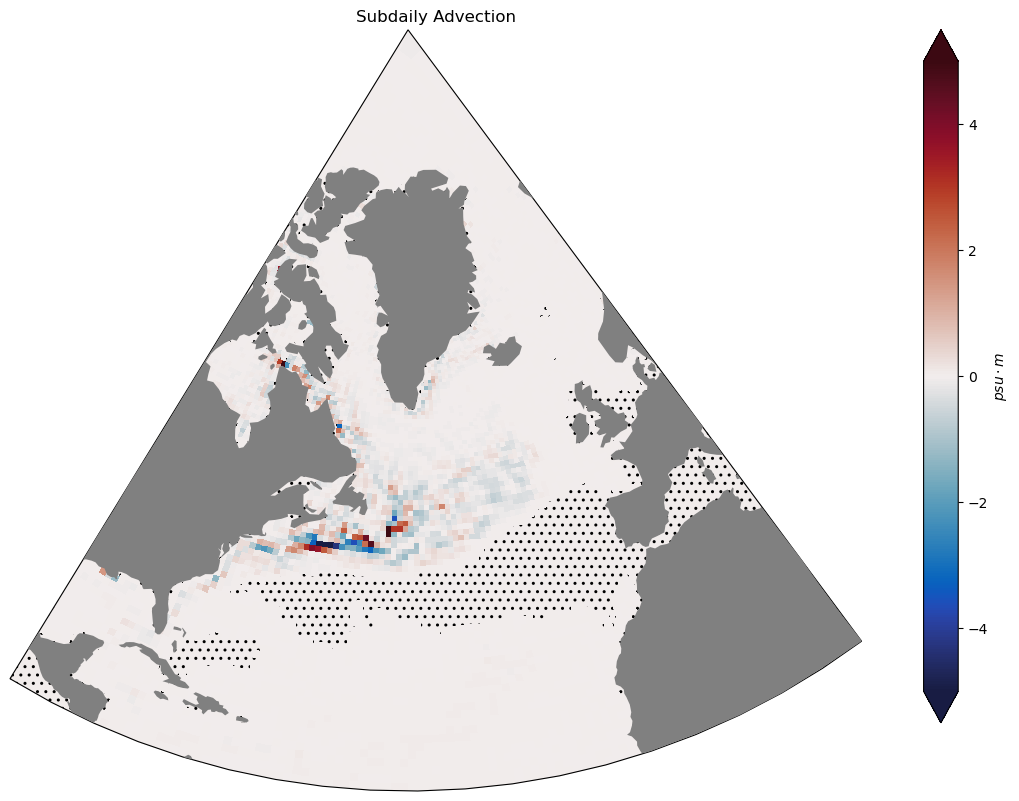

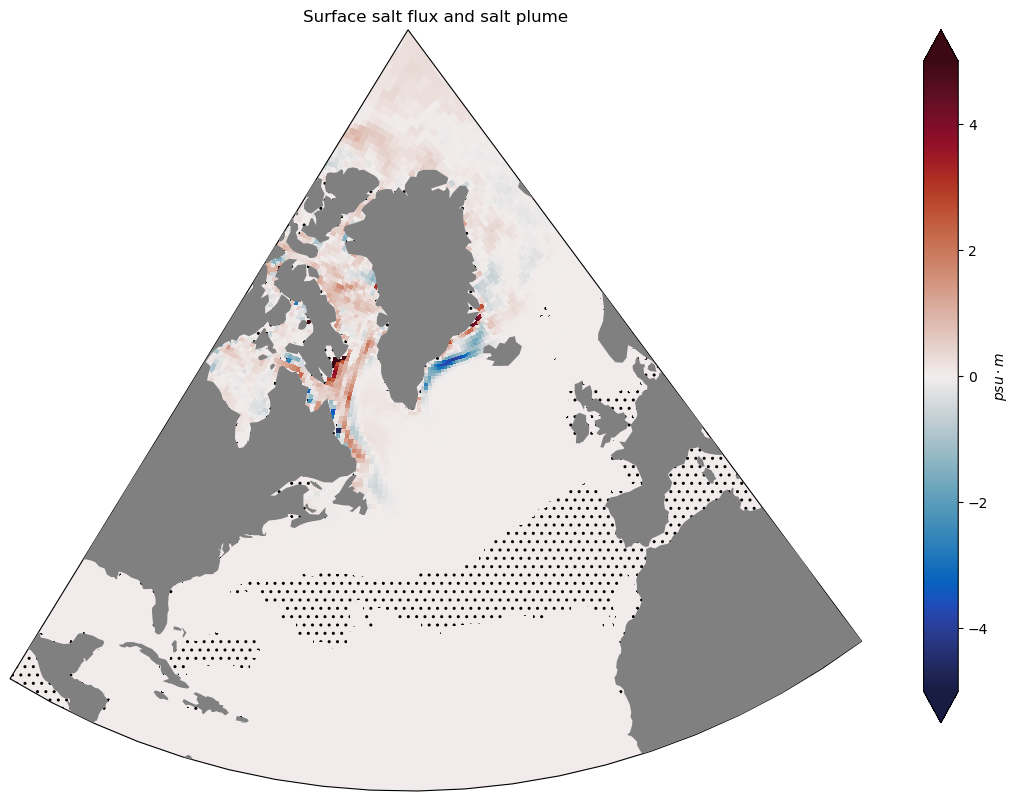

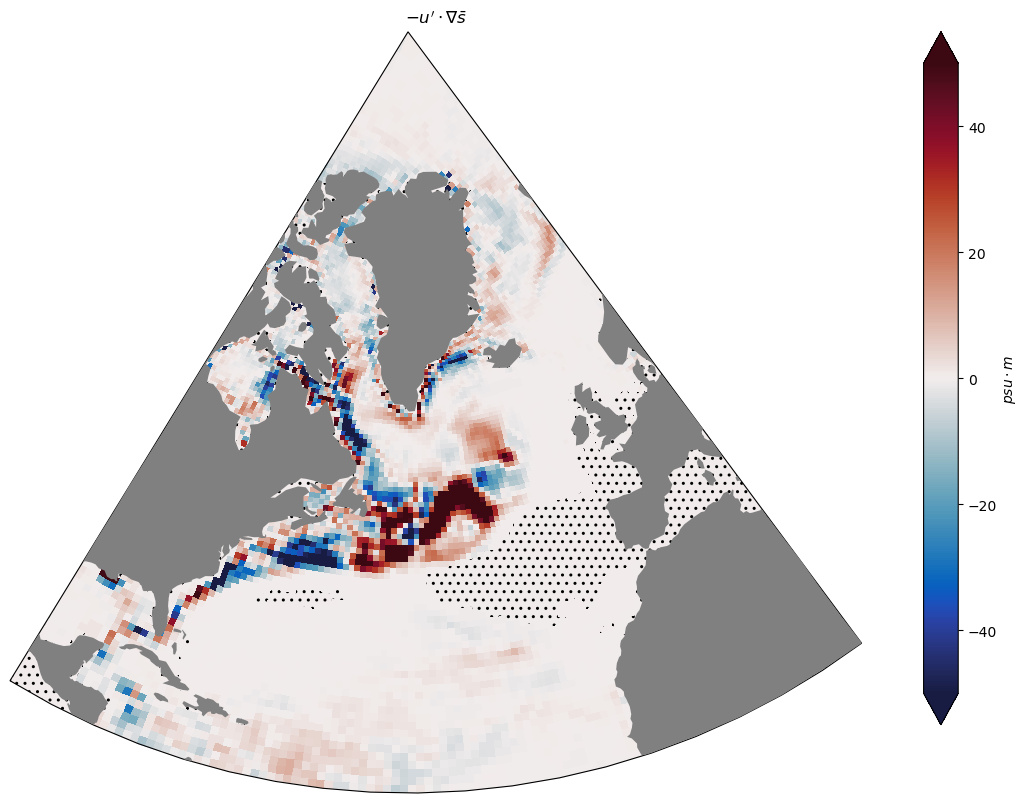

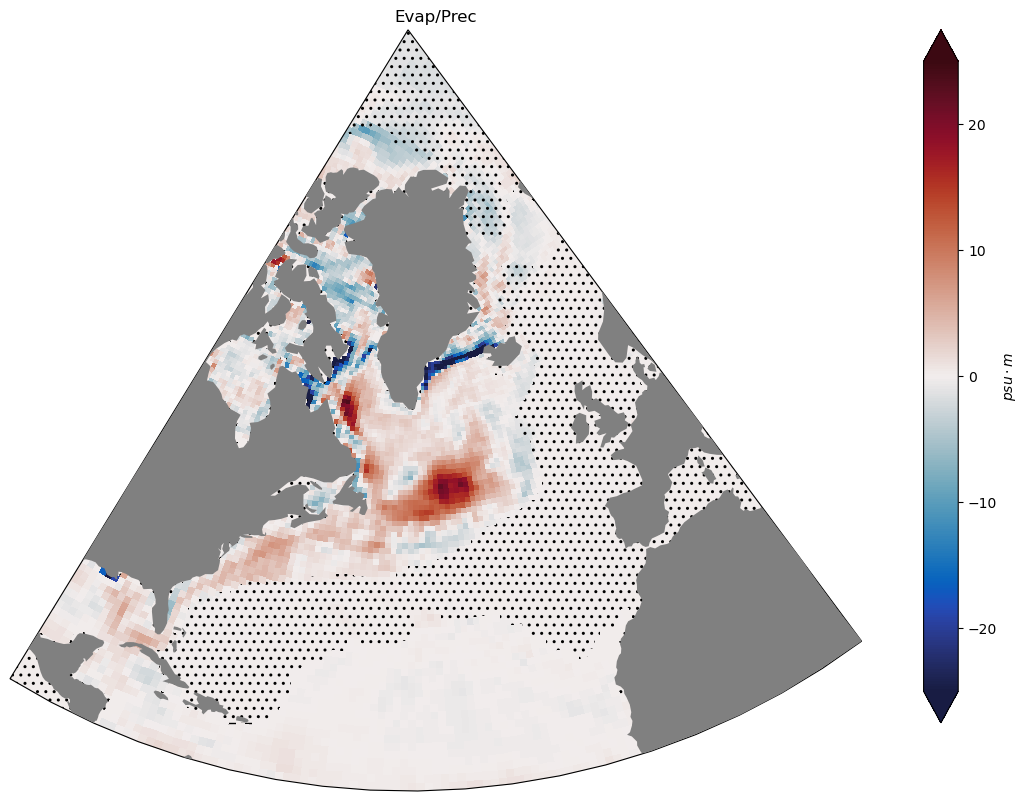

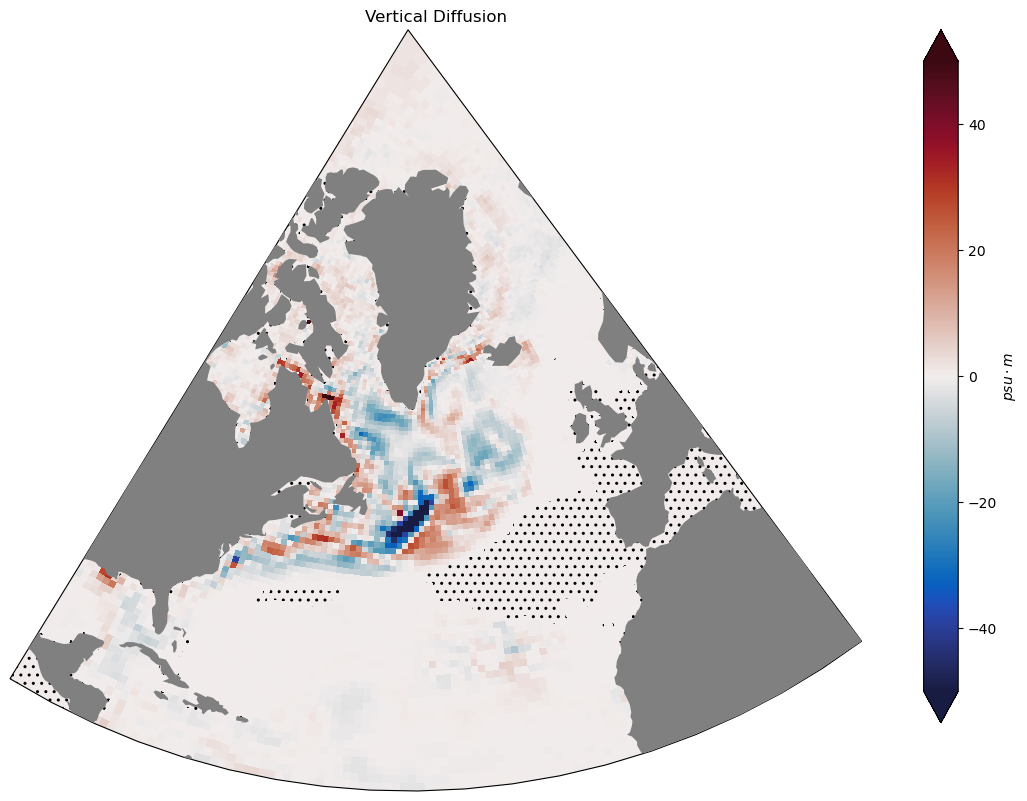

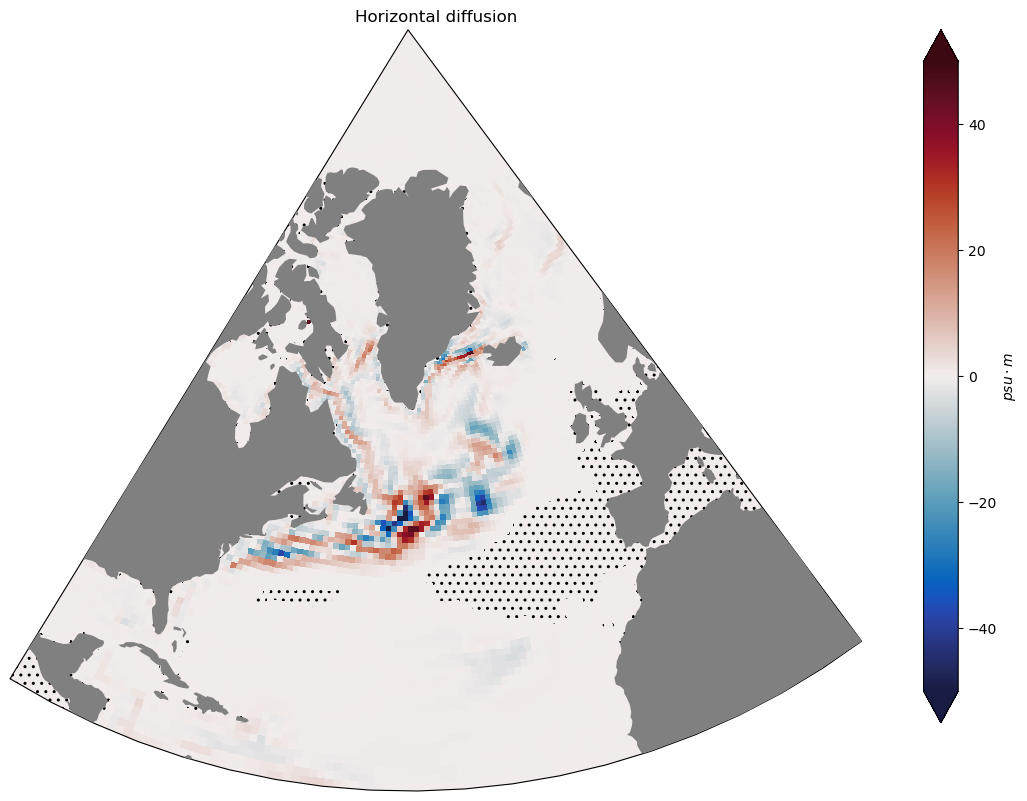

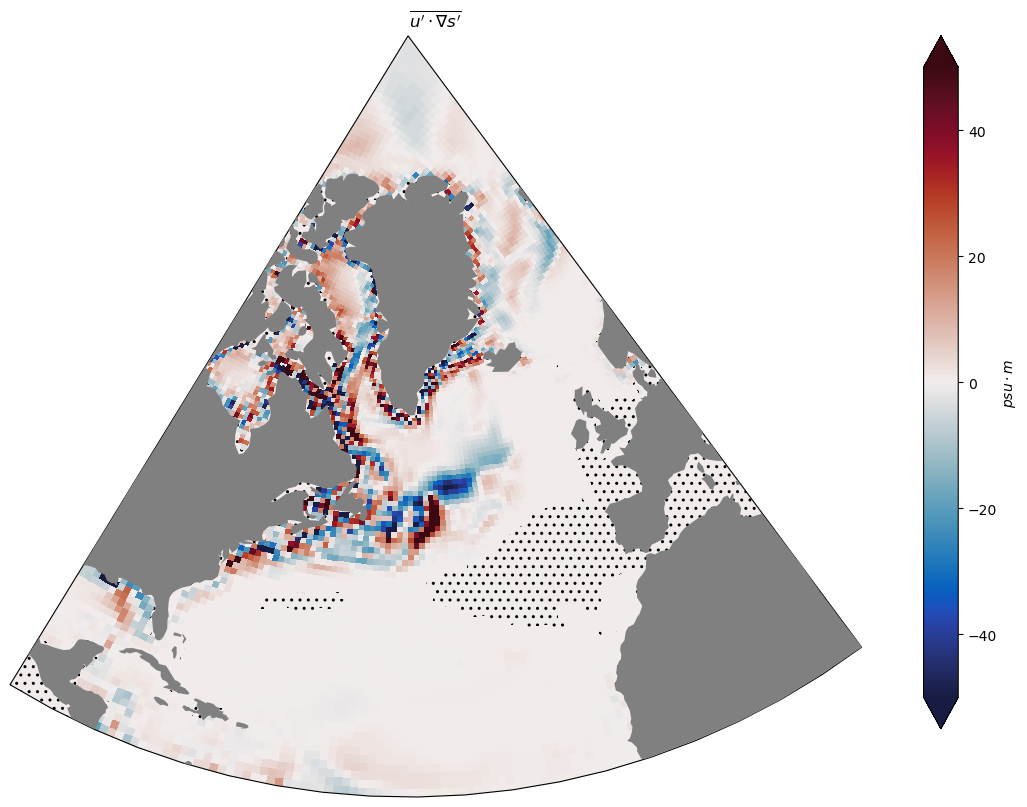

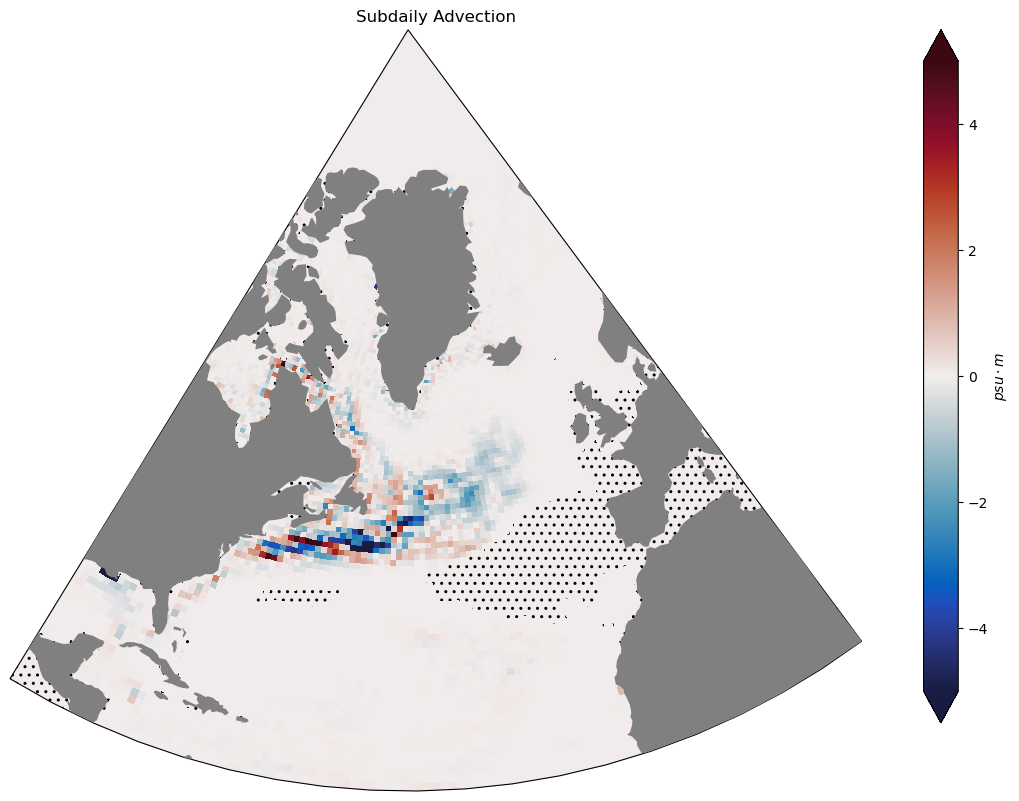

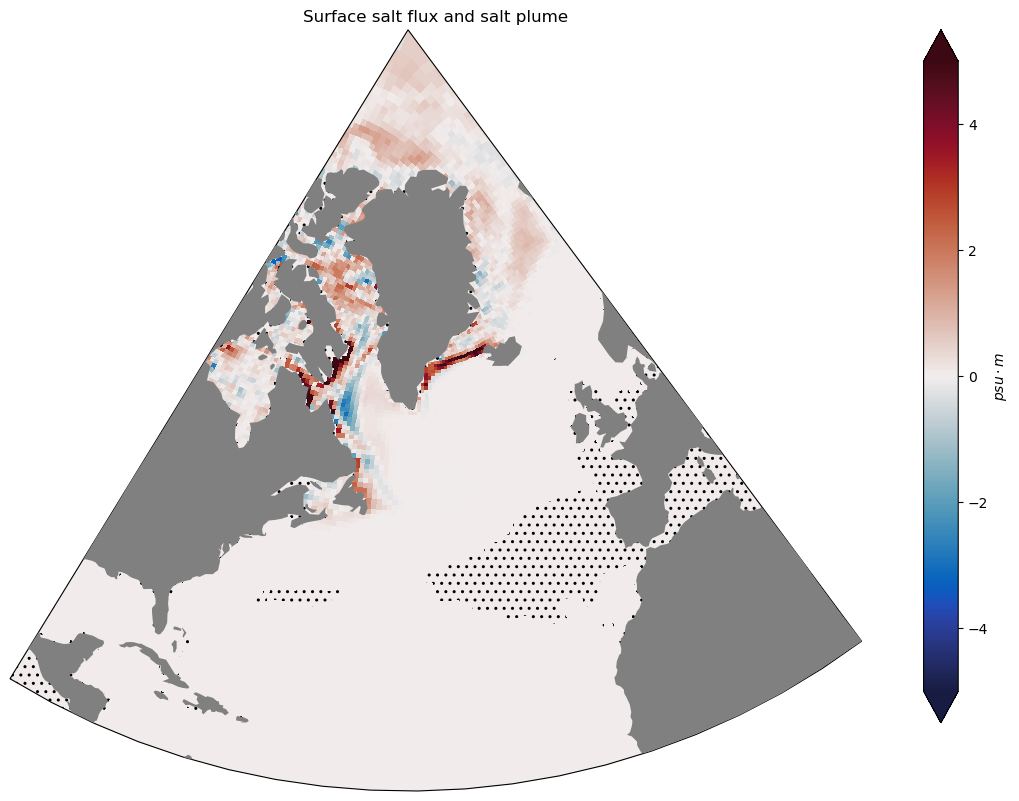

In [10]:
for case in ['fresh','salty']:
    maps,table = open_case(case)
    if case == 'salty':
        TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_salty,NUMBER_OF_PARTICLE_salty,VOLUME_EACH_salty,salty_idate
    if case == 'fresh':
        TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_fresh,NUMBER_OF_PARTICLE_fresh,VOLUME_EACH_fresh,fresh_idate
    
    for var in rhs_list:
        if var == 'F':
            vmax = 25
            hashtype = 'surface'
            save_as = fig_dic[case]+'(b)'+suffix
        else:
            hashtype = 'wholedepth'
            if var == 'A':
                save_as = fig_dic[case]+'(a)'+suffix
            else:
                save_as = sup_pref+case+'_'+var
            if var in ['I','e_ua']:
                vmax = 5
            else:
                vmax = 50
        plot2d(-maps[var].sum(dim = 'Z'),vmax = vmax,title = case_term_dic[var],hash_type = hashtype,save_as = save_as)

In [11]:
# plt.pcolormesh(xg[10],yg[10],ct[10],vmax = 1e4)
# plt.colorbar()